In [1]:
import tensorflow.keras.layers
import tensorflow.keras.models

x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

In [2]:
#build the model using the tensorflow.keras.models API
encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

In [4]:
#summary of the encoder architecture
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 300)               235500    
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 2)                 602       
_________________________________________________________________
encoder_output (LeakyReLU)   (None, 2)                 0         
Total params: 236,102
Trainable params: 236,102
Non-trainable params: 0
_________________________________________________________________


In [5]:
#Building the Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

In [6]:
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")

In [7]:
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
decoder_dense_1 (Dense)      (None, 300)               900       
_________________________________________________________________
decoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 784)               235984    
_________________________________________________________________
decoder_output (LeakyReLU)   (None, 784)               0         
Total params: 236,884
Trainable params: 236,884
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Building the Autoencoder
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")

In [11]:
ae.summary()

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AE_input (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
encoder_model (Functional)   (None, 2)                 236102    
_________________________________________________________________
decoder_model (Functional)   (None, 784)               236884    
Total params: 472,986
Trainable params: 472,986
Non-trainable params: 0
_________________________________________________________________


In [12]:
#model building process
import tensorflow.keras.optimizers  
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

In [13]:
#Loading the MNIST Dataset and Training Autoencoder
import tensorflow.keras.datasets
import numpy

(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
#train the autoencoder using the fit method
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0612 - val_loss: 0.0555
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0545 - val_loss: 0.0537
Epoch 3/20
235/235 [==============================] - 2s 11ms/step - loss: 0.0531 - val_loss: 0.0525
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0520 - val_loss: 0.0514
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0509 - val_loss: 0.0503
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0498 - val_loss: 0.0492
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0488 - val_loss: 0.0483
Epoch 8/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0481 - val_loss: 0.0479
Epoch 9/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0475 - val_loss: 0.0473
Epoch 10/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0471 - val_lo

In [15]:
#Making Predictions
encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)

In [23]:
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

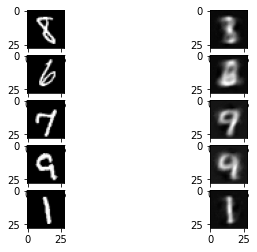

In [24]:
#output of the decoder is a 1D vector of length 784
#display the reconstructed images, the decoder output is reshaped to 28x28
#import pandas as pd
import matplotlib.pyplot as plt
num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    #matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    plt.subplot(num_images_to_show, 2, plot_ind)
    #matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    #matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    #matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")
    plt.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    plt.subplot(num_images_to_show, 2, plot_ind+1)
    plt.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

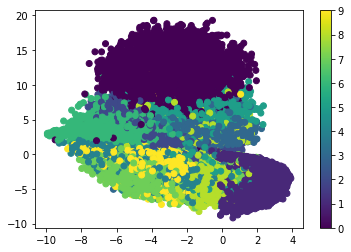

In [27]:
#To have a better understanding of the output of the encoder model, let's display all the 1D vectors it returns
#matplotlib.pyplot.figure()
#matplotlib.pyplot.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train) 
#matplotlib.pyplot.colorbar()
plt.figure()
plt.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train) 
plt.colorbar()